In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval

data = pd.read_csv("data/movies_metadata.csv")
data = data[data['original_language']=='en']
data = data[['budget', 'genres','id', 'imdb_id','original_title', 'popularity', 'release_date', 'revenue', 'runtime', 'vote_average', 'vote_count']]
data = data[(data['genres'] != "[]")]
data['genres'] = data['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
data = data[(data.T != 0).all()]
data.head()

,budget,genres,id,imdb_id,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count
0,30000000.0,"[Animation, Comedy, Family]",862.0,tt0114709,Toy Story,21.946943,30/10/1995,373554033.0,81.0,7.7,5415.0
1,65000000.0,"[Adventure, Fantasy, Family]",8844.0,tt0113497,Jumanji,17.015539,15/12/1995,262797249.0,104.0,6.9,2413.0
3,16000000.0,"[Comedy, Drama, Romance]",31357.0,tt0114885,Waiting to Exhale,3.859495,22/12/1995,81452156.0,127.0,6.1,34.0
5,60000000.0,"[Action, Crime, Drama, Thriller]",949.0,tt0113277,Heat,17.924927,15/12/1995,187436818.0,170.0,7.7,1886.0
8,35000000.0,"[Action, Adventure, Thriller]",9091.0,tt0114576,Sudden Death,5.231580,22/12/1995,64350171.0,106.0,5.5,174.0


Correlation between budget and revenue is:  0.7269764876349211


Text(0, 0.5, 'Budget')

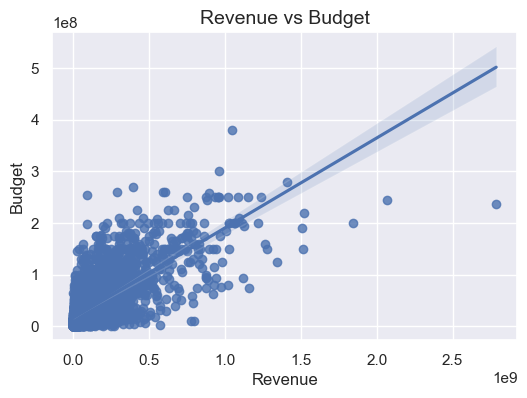

In [22]:
# find correlation between budget and revenue
data_corr = data.corr()
print("Correlation between budget and revenue is: ", data_corr.loc['revenue','budget'])

ax = sns.regplot(x=data['revenue'], y=data['budget'], color='b')
ax.set_title("Revenue vs Budget", fontsize=14)
ax.set_xlabel("Revenue", fontsize=12)
ax.set_ylabel("Budget", fontsize=12)


Correlation between Popularity And Profit is:  0.4296927317848958


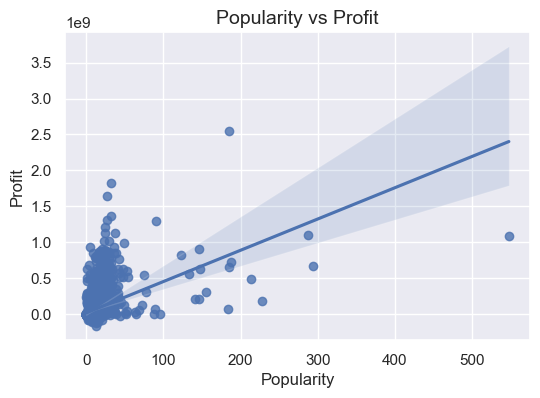

In [25]:
# find correlation between popularity and Profit
data['Profit'] = data['revenue'] - data['budget']
data_corr2 = data.corr()
ax = sns.regplot(x=data['popularity'], y=data['Profit'], color='b')
ax.set_title("Popularity vs Profit", fontsize=14)
ax.set_xlabel("Popularity", fontsize=12)
ax.set_ylabel("Profit", fontsize=12)
print("Correlation between Popularity And Profit is: ", data_corr2.loc['popularity','Profit'])